In [29]:
# SALES DATA ANALYSIS

import pandas as pd
import matplotlib.pyplot as plt

sales_data = pd.read_excel("eletronic_sales.xlsx")

# Create Revenue column
sales_data["Revenue"] = sales_data["Units"] * sales_data["Price"] * 1000 # To naira

# Necessary KPIs
total_revenue = sales_data["Revenue"].sum()
avg_order_value = sales_data["Revenue"].mean()
total_units_sold = sales_data["Units"].sum()
num_transactions = len(sales_data)


In [30]:
# KPI breakdowns
revenue_by_branch = sales_data.groupby("Branch")["Revenue"].sum().sort_values(ascending=False)
revenue_by_agent = sales_data.groupby("Sales Agent")["Revenue"].sum().sort_values(ascending=False)
revenue_by_product = sales_data.groupby("Products")["Revenue"].sum().sort_values(ascending=False)


In [31]:
# Sales growth over time
sales_data["YearMonth"] = sales_data["Date"].dt.to_period("M")
monthly_revenue = sales_data.groupby("YearMonth")["Revenue"].sum().to_timestamp()

# Growth Metrics
monthly_revenue_df = monthly_revenue.to_frame().reset_index()
monthly_revenue_df.rename(columns={"Revenue":"Monthly Revenue"}, inplace=True)
# MoM Growth (%)
monthly_revenue_df["MoM Growth %"] = monthly_revenue_df["Monthly Revenue"].pct_change() * 100
# YoY Growth (%)
monthly_revenue_df["YoY Growth %"] = monthly_revenue_df["Monthly Revenue"].pct_change(12) * 100


In [32]:
# KPI Summary
kpi_summary = {
    "Total Revenue": total_revenue,
    "Average Order Value": avg_order_value,
    "Total Units Sold": total_units_sold,
    "Number of Transactions": num_transactions,
    "Top Branch": revenue_by_branch.idxmax(),
    "Top Agent": revenue_by_agent.idxmax(),
    "Top Product": revenue_by_product.idxmax()
}
print(kpi_summary)


{'Total Revenue': np.float64(19627880.0), 'Average Order Value': np.float64(456462.32558139536), 'Total Units Sold': np.int64(2121), 'Number of Transactions': 43, 'Top Branch': 'Woji', 'Top Agent': 'Emeka', 'Top Product': 'HP'}


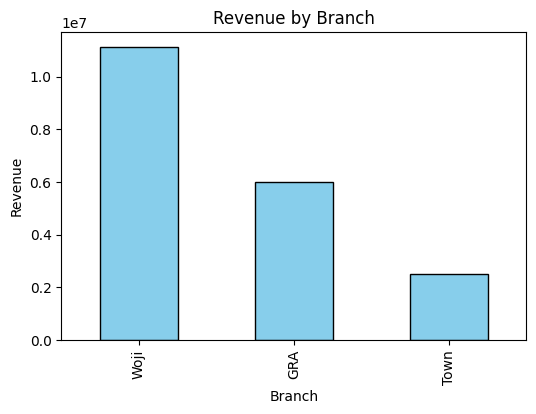

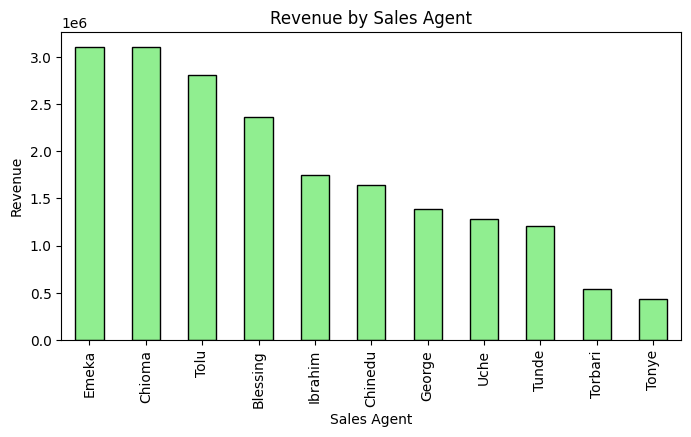

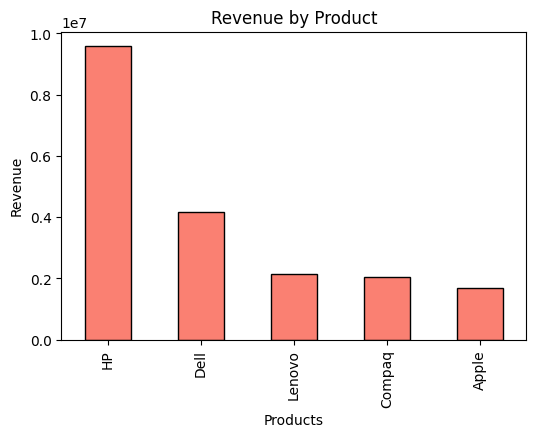

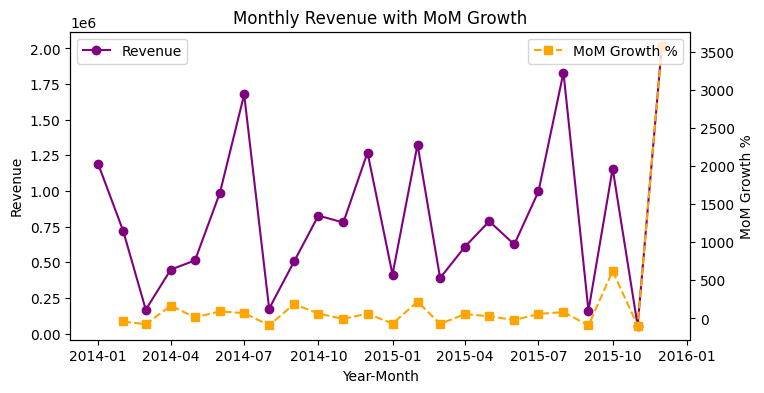

In [33]:
# Visualization

# Revenue by Branch
revenue_by_branch.plot(kind="bar", figsize=(6,4), color="skyblue", edgecolor="black", title="Revenue by Branch")
plt.ylabel("Revenue")
plt.show()

# Revenue by Sales Agent
revenue_by_agent.plot(kind="bar", figsize=(8,4), color="lightgreen", edgecolor="black", title="Revenue by Sales Agent")
plt.ylabel("Revenue")
plt.show()

# Revenue by Product
revenue_by_product.plot(kind="bar", figsize=(6,4), color="salmon", edgecolor="black", title="Revenue by Product")
plt.ylabel("Revenue")
plt.show()

# Monthly Revenue Trend with MoM growth
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(monthly_revenue_df["YearMonth"], monthly_revenue_df["Monthly Revenue"], marker="o", color="purple", label="Revenue")
ax1.set_ylabel("Revenue")
ax1.set_xlabel("Year-Month")
ax1.set_title("Monthly Revenue with MoM Growth")

# Secondary axis for MoM %
ax2 = ax1.twinx()
ax2.plot(monthly_revenue_df["YearMonth"], monthly_revenue_df["MoM Growth %"], marker="s", linestyle="--", color="orange", label="MoM Growth %")
ax2.set_ylabel("MoM Growth %")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.xticks(rotation=45)
plt.show()
